# HACKVERSE'22 
<hr/>

Submitted by <br>
**TEAM SHRI RAJARAJESHWARI ADHOLOKAM**<br>

Members: **ASINTHARA K , HABIS K V , STEBIN GEORGE , EMIL GIBI** <br>
<hr/>


### Acknowledgement

Thanks to all the teachers who taught us to write a letter to write a whole program to solve a problem.<br/>
Thanks to all the experiences and CIAs which helped us in completing this Hackathon.<br/>
Thanks to God and my teammates who supported and helped us throughout.<br/>
Thank You

## OVERVIEW

### Aim

Life Expectancy Prediction: Based on features predict life expectancy of various countries

### Problem Definition

Various factors affect the life expectancy of different countries. And various studies have been done to understand these different factors that affect the life expectancy, But most of these studies failed to consider the effect of immunization like Hepatitis B, Polio, Diphtheria etc and Human Development Index. 

So we are trying to do a study about life expectancy using the dataset of different countries from the year 2000 to 2015. We will be focusing on factors that were not taken into account in the past, like, immunization factors, mortality factors, economic factors, social factors, and other health related factors as well.

- This study will help in giving important inference to different countries in order to let them know which area they should focus more on to improve the life expectancy of its population

### Approach

We started with a proper Flow Chart and different works were delegated according to the strength of different members.The data given is not the ideal data to build a model and thus it is necessary to know and learn about the data. Most of the work time has to be given to manipulate with data and use Trial and error method. After Data Preprocessing we used the data in different models.About 10 models were taken and the best 4 was selected for hyperparameter tuning. PCA was also done to the dataset to check how it improves the accuracy. Various other trial and error methods were done to reach into the optimum model which was deployed using Flask. A Picture (Drishyam) tells a better story than words so we focused more on Visualization when it came to solving various case questions and also to get other important inferences from the dataset.

### Sections

1. Importing
2. Exploratory Data Analysis
3. Mean Imputation
4. Models 
    - 4.1 Data preprocessing for models
      - 4.1.1 Normalization using StandardScaler
      - 4.1.2 Splitting the dataset
    - 4.2 Ridge_Regressor
      - 4.2.1 Feature Importance of Ridge Regressor
    - 4.3 Decision Tree
      - 4.3.1 Feature Imporatance of Decision Tree
    - 4.4 RandomForestRegressor
      - 4.4.1 Feature Importance of RandomForestRegressor
    - 4.5 MLPRegressor
    - 4.6 Support Vector Machine
    - 4.7 XGBOOST
    - 4.8 LIGHTBGM
    - 4.9 ADABOOSTEREGRESSOR
    - 4.10 ELASTIC NET
5. SCORES
6. HYPERPARAMETER TUNING
7. SCORES AFTER HYPERPARAMETER TUNING
8. TRIAL AND ERROR METHODS(PCA,ONEHOTENCODING, ETC)

### References

- https://www.youtube.com/watch
- https://www.datacamp.com/community/tutorials/
- https://towardsdatascience.com/
- https://www.kaggle.com/mirzarahim/
- https://en.wikipedia.org
- https://stephenallwright.com
- https://ourworldindata.org

### 1. IMPORTING

In [84]:
# ***Importing***

import numpy as np   #-- linear algebra
import pandas as pd  #-- data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score # we are using this for model tunning
from statsmodels.tools.eval_measures import rmse

from warnings import filterwarnings
filterwarnings('ignore')

####  Numpy
 - It is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

#### Pandas
 - It is used for data manipulation and analysis

#### matplotlib.pyplot
 - It is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting.

####  statsmodels.formula.api
 - A convenience interface for specifying models using formula strings and DataFrames. This API directly exposes the from_formula class method of models that support the formula API.

#### seaborn
 - It is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

#### sklearn.preprocessing
 - It provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

#### sklearn.model_selection
 - Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds 
   1. ###### train_test_split
      - The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. 
   2. ###### GridSearchCV 
      - GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.
   3. ###### cross_val_score 
      -  It is a method which runs cross validation on a dataset to test whether the model can generalise over the whole dataset

#### sklearn.metrics 
 - It implements several loss, score, and utility functions to measure classification performance
   1. ###### confusion_matrix 
      -  It is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and            summarizes the performance of a classification algorithm.
   2. ###### accuracy_score
      - It is used to find the fraction of correctly classified labels.This function returns either the fraction of the correct         predictions or the number of correct predictions, depending on the value of the normalize parameter.
   3. ###### classification_report
         - A Classification report is used to measure the quality of predictions from a classification algorithm. How many      predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False     Negatives are used to predict the metrics of a classification report as shown below.
   4. ###### roc_auc_score  
      - This function can be used for multi-class classification. The multi-class One-vs-One scheme compares every unique pairwise combination of classes. In this section, we calculate the AUC using the OvR and OvO schemes. We report a macro average, and a prevalence-weighted average.
   5. ###### roc_curve
      - ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction
   6. ###### mean_squared_error
      - In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.
   7. ###### r2_score
      -  is a very important metric that is used to evaluate the performance of a regression-based machine learning model.Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a r2 score of 0.0.

### 2. Exploratory Data Analysis

In [40]:
Life_Expectancy = pd.read_csv(r"C:\Users\USER\Downloads\Life Expectancy Data_HV22.csv")

# Copying the dataframe to another variable to use it for various data preprocessing

dataf = Life_Expectancy.copy()




In [55]:
# The dropna() method removes the rows that contains NULL values. 
# The dropna() method returns a new DataFrame object unless the inplace parameter is set to True ,
# in that case the dropna() method does the removing in the original DataFrame instead.*\

dataf = dataf.dropna()  

In [46]:
dataf.info()    # information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

**Total number of rows with missing values is 1289
.It is about 44 percent of the dataset**

In [47]:
dataf.head(10)  #this function is used to get the first n rows

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [48]:
nRow, nCol = dataf.shape   # returns the total number of rows and columns
print(f'There are {nRow} rows and {nCol} columns')

There are 1649 rows and 22 columns


In [31]:
dataf.corr()     # used to find pairwise correlation of all columns

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


**CORRELATION HEATMAP**<br>
A correlation heat map is a graphical representation of a corrleation matrix representing the correlation between different variables. This helps in understanding the linear dependencies of variables over each other. Correlation is always calculated between two variables, and it has a range of [-1,1] .
- A correlation value close to zero means the two variables are unelated.
- An absolute correlation value close to 1 means the two variables are perfectly related.

<AxesSubplot:>

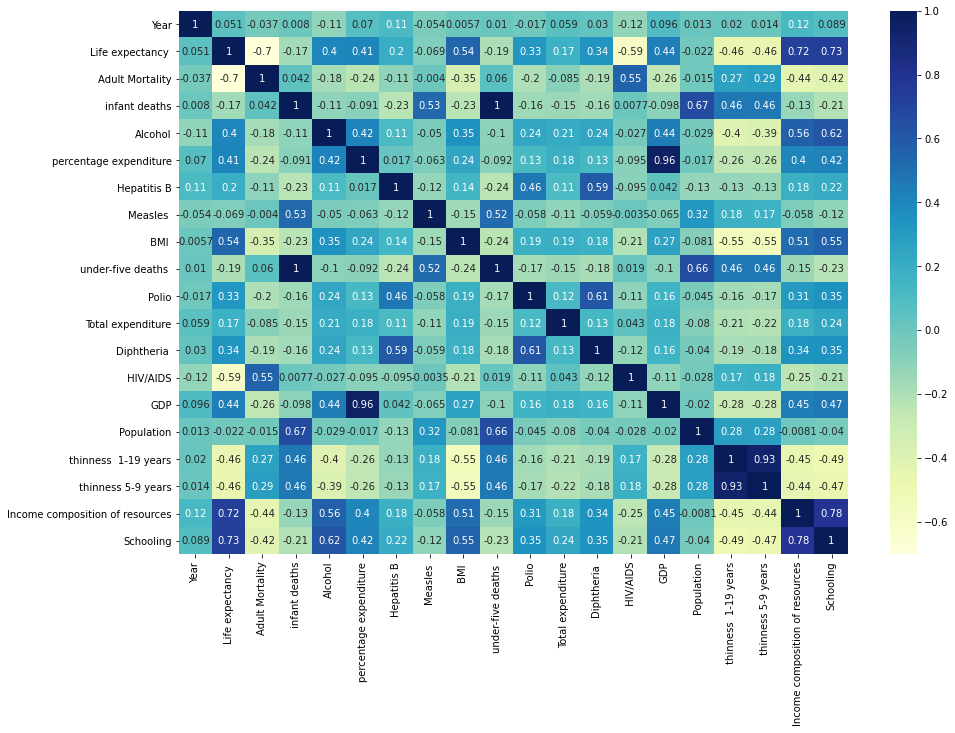

In [71]:
# plotting the heatmap

plt.figure(figsize=(15,10))
sns.heatmap(dataf.corr(), cmap="YlGnBu", annot=True)


- Life Expectancy has a considerable correlation with Adult Mortality, BMI, Schooling, HIV/AIDS, ICOR and GDP.
- Life Expectancy and Adult Moratality : High Negative Correlation.
- Life Expectancy and BMI : Positive Correlation 
- Life Expectancy and GDP: Positive Correlation (country's GDP influence Life expectancy)
- Life Expectancy and Schooling: Positive Correlation (proper schooling leads to adoption of healthy habits and discipline)

In [74]:
#Original dataset

datafram = pd.read_csv(r"C:\Users\USER\Downloads\Life Expectancy Data_HV22.csv")    # reading the dataset


In [76]:
# Count of Countries without dropping the NA values(Original values)

datafram['Country'].nunique()              

193

In [58]:
# Count of Countries without dropping the NA values

dataf['Country'].nunique()

133

We are encountering the loss of values of **60 Countries** while dropping NA values. 
- This indicates that the dataset will face a very high loss of data while dropna() is being used. Thus we decided to use **imputation techniques** to replace the missing values with other values.

### 3. MEAN IMPUTATION

In [311]:
df = pd.read_csv(r"C:\Users\USER\Downloads\Life Expectancy Data_HV22.csv")     # reading the dataset

In [312]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)

df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [313]:
df.describe(include="all")                 # returns description of the data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Cyprus,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,...,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,NaN,2008.000000,NaN,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,...,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,NaN,2012.000000,NaN,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,...,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000


In [68]:
df.info()       # prints information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [296]:
nRow, nCol = df.shape                # returns the number of rows and columns in the dataset
print(f'There are {nRow} rows and {nCol} columns')

There are 2938 rows and 22 columns


<AxesSubplot:>

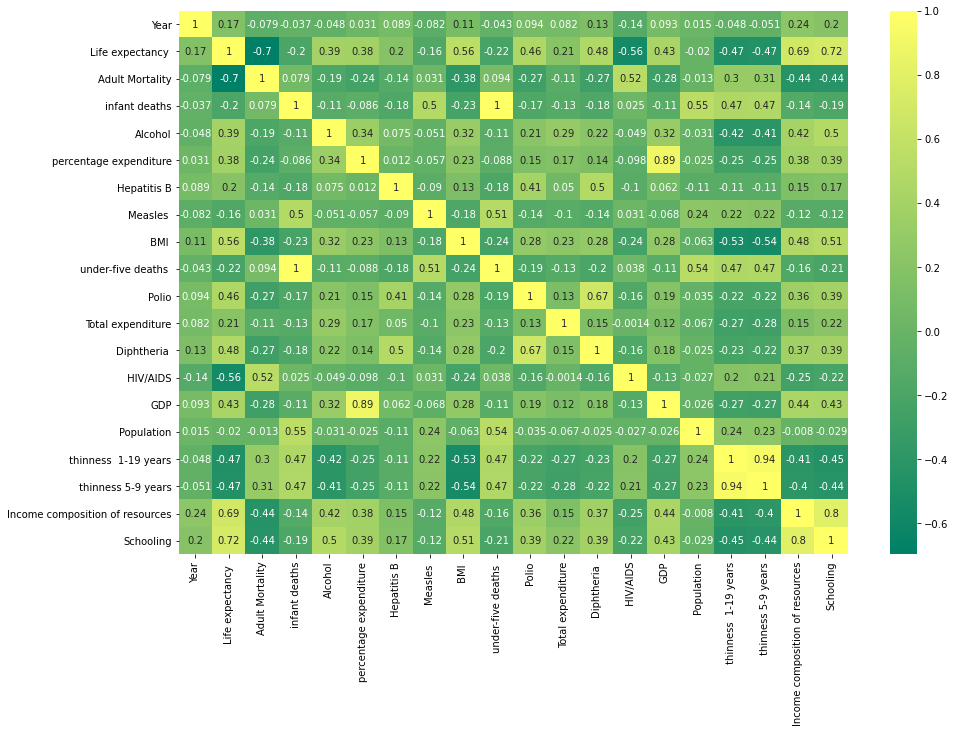

In [73]:
# plot the heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="summer", annot=True)


In [79]:
list_cols = df.corr()["Life expectancy "].abs().sort_values(ascending=False)[1:]
column_name = ""
for col in list_cols.index:
    column_name += col + ","
names = column_name[0:len(column_name)-1].split(",")

In [78]:
 df.corr()["Life expectancy "].sort_values(ascending=False)[1:]

Schooling                          0.715066
Income composition of resources    0.692483
 BMI                               0.559255
Diphtheria                         0.475418
Polio                              0.461574
GDP                                0.430493
Alcohol                            0.391598
percentage expenditure             0.381791
Total expenditure                  0.207981
Hepatitis B                        0.203771
Year                               0.169623
Population                        -0.019638
Measles                           -0.157574
infant deaths                     -0.196535
under-five deaths                 -0.222503
 thinness 5-9 years               -0.466629
 thinness  1-19 years             -0.472162
 HIV/AIDS                         -0.556457
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64

In [81]:
rsquare = []
# defining the variables
for i in range(len(names)):
    x = df[names[0:i]]
    y = df["Life expectancy "]


    # adding the constant term
    x = sm.add_constant(x)

    # performing the regression
    # and fitting the model
    result = sm.OLS(y, x).fit()

# printing the summary table
#     print(result.rsquared)
    rsquare.append([i+1,result.rsquared])

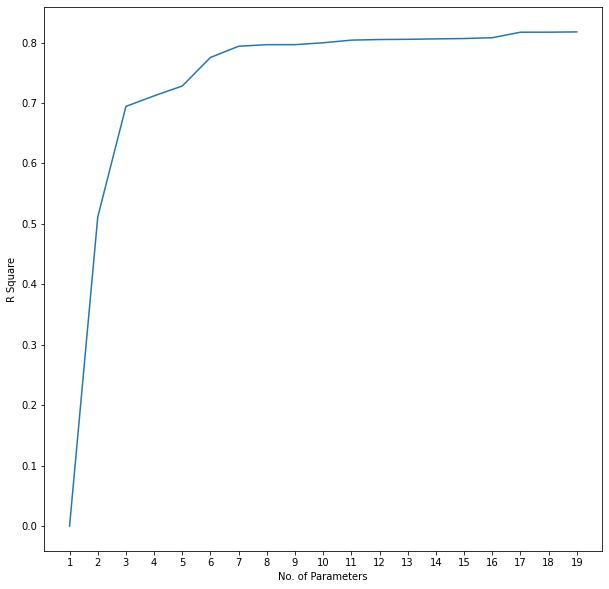

In [82]:
x, y =  np.array(rsquare).T
plt.figure(figsize=(10,10)) 
plt.xlabel("No. of Parameters")
plt.ylabel("R Square")
plt.xticks(x)
plt.plot(x,y)
plt.savefig("plot2.eps")
plt.show() 

<hr/>

<hr/>

# 4. MODELS

### 4.1. Data Preprocessing for Models

In [302]:
df = pd.read_csv(r"C:\Users\USER\Downloads\Life Expectancy Data_HV22.csv")     # reading the dataset

In [303]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)

df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [304]:
df   #displaying the data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [159]:
df.columns             # returns all the column headers

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [160]:
df.drop(["Country"],axis=1,inplace=True)                      #deletes "Country" and "Status" columns from the dataset
df.drop(["Status"],axis=1,inplace=True)
df
df.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [208]:
scores={}

### 4.1.1. Normalization using StandardScaler

In [161]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)
df = pd.DataFrame(scaled,columns=df.columns)

In [162]:
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,-0.444448,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,1.404986,-0.980950,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,1.188210,-0.980950,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,0.971434,-1.023029,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,0.754658,-1.054587,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,-2.622015,4.499494,-0.028022,-0.062024,-0.371433,-0.573018,-0.208332,-0.563194,-0.000223,-0.666013,0.496616,-0.732952,6.275044,-0.535137,0.000449,1.037896,1.010651,-1.076989,-0.855681
2934,-0.979550,-2.600976,4.435009,-0.036503,-0.138640,-0.371433,-3.274163,-0.123991,-0.583270,-0.006456,-3.235808,0.242435,-0.606027,6.885650,-0.535214,-0.002221,1.128934,1.122210,-1.023274,-0.763764
2935,-1.196326,-2.569417,-0.739941,-0.044984,-0.044146,-0.371433,-0.351612,-0.184521,-0.603346,-0.012690,-0.409034,0.246602,-0.479102,7.496256,-0.565364,-0.234691,-0.828375,-0.796600,-0.979326,-0.610570
2936,-1.413102,-2.516818,4.201249,-0.044984,-0.736246,-0.371433,-0.218769,-0.164897,-0.623422,-0.018924,-0.280544,0.092426,-0.309869,7.949287,-0.527964,-0.007196,-0.737337,-0.707353,-0.979326,-0.671847


In [163]:
y=df[["Life expectancy "]]                        # Deletes the "Life expectancy" column from the dataset
df.drop(["Life expectancy "],axis=1,inplace=True)
x=df

In [165]:
x

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,1.404986,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,1.188210,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,0.971434,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,0.754658,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,4.499494,-0.028022,-0.062024,-0.371433,-0.573018,-0.208332,-0.563194,-0.000223,-0.666013,0.496616,-0.732952,6.275044,-0.535137,0.000449,1.037896,1.010651,-1.076989,-0.855681
2934,-0.979550,4.435009,-0.036503,-0.138640,-0.371433,-3.274163,-0.123991,-0.583270,-0.006456,-3.235808,0.242435,-0.606027,6.885650,-0.535214,-0.002221,1.128934,1.122210,-1.023274,-0.763764
2935,-1.196326,-0.739941,-0.044984,-0.044146,-0.371433,-0.351612,-0.184521,-0.603346,-0.012690,-0.409034,0.246602,-0.479102,7.496256,-0.565364,-0.234691,-0.828375,-0.796600,-0.979326,-0.610570
2936,-1.413102,4.201249,-0.044984,-0.736246,-0.371433,-0.218769,-0.164897,-0.623422,-0.018924,-0.280544,0.092426,-0.309869,7.949287,-0.527964,-0.007196,-0.737337,-0.707353,-0.979326,-0.671847


#### 4.1.2 Splitting the Dataset

In [166]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test (0.75/0.25 train/test). Shuffle the data

features_train, features_test, targets_train, targets_test = train_test_split(x, y, shuffle=True)

<hr/>

### 4.2. Ridge_Regressor

In [214]:
from sklearn.linear_model import Ridge

# Create a ridge regressor with default parameters and fit it to our data
ridge = Ridge()
ridge.fit(features_train, targets_train)
print("Training accuracy: ",ridge.score(features_train, targets_train),"\nTesting accuracy: ", ridge.score(features_test, targets_test))

test=ridge.score(features_test, targets_test)

scores["Ridge"]=test


Training accuracy:  0.8146170839312978 
Testing accuracy:  0.824917245940955


### 4.2.1. Feature Importance of Ridge Regressor

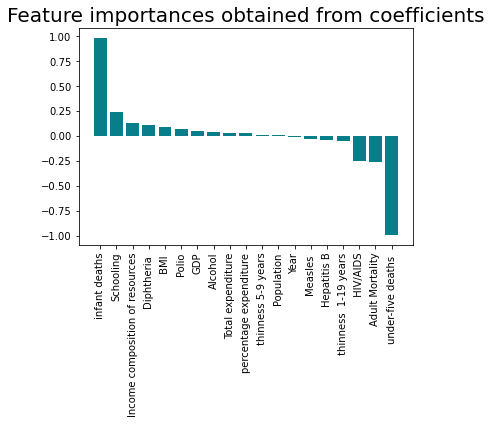

<Figure size 3600x3600 with 0 Axes>

In [183]:
importances = pd.DataFrame(data={
    'Attribute': features_train.columns,
    'Importance': ridge.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.figure(figsize=(50,50))
plt.show()

<hr/>

### 4.3. DecisionTreeRegressor

In [216]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor with max depth of 4 and fit it 
# to our data
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(features_train, targets_train)

# Show the R Squared (Coefficient of determination) on both train and test data
print("Training accuracy: ",tree.score(features_train, targets_train),"\nTesting accuracy: ", tree.score(features_test, targets_test))

scores["DecisionTree"]=tree.score(features_test, targets_test)

Training accuracy:  0.8800007752413203 
Testing accuracy:  0.857765827676666


[Text(558.0, 978.48, 'X[12] <= -0.195\nmse = 1.02\nsamples = 2203\nvalue = -0.006'),
 Text(279.0, 761.0400000000001, 'X[17] <= 0.859\nmse = 0.384\nsamples = 1637\nvalue = 0.45'),
 Text(139.5, 543.6, 'X[1] <= 0.175\nmse = 0.262\nsamples = 1229\nvalue = 0.225'),
 Text(69.75, 326.1600000000001, 'X[18] <= -0.197\nmse = 0.154\nsamples = 937\nvalue = 0.402'),
 Text(34.875, 108.72000000000003, 'mse = 0.18\nsamples = 180\nvalue = -0.009'),
 Text(104.625, 108.72000000000003, 'mse = 0.098\nsamples = 757\nvalue = 0.499'),
 Text(209.25, 326.1600000000001, 'X[17] <= -0.408\nmse = 0.185\nsamples = 292\nvalue = -0.344'),
 Text(174.375, 108.72000000000003, 'mse = 0.12\nsamples = 127\nvalue = -0.647'),
 Text(244.125, 108.72000000000003, 'mse = 0.109\nsamples = 165\nvalue = -0.11'),
 Text(418.5, 543.6, 'X[17] <= 1.059\nmse = 0.14\nsamples = 408\nvalue = 1.127'),
 Text(348.75, 326.1600000000001, 'X[15] <= -0.885\nmse = 0.091\nsamples = 136\nvalue = 0.816'),
 Text(313.875, 108.72000000000003, 'mse = 0.06\

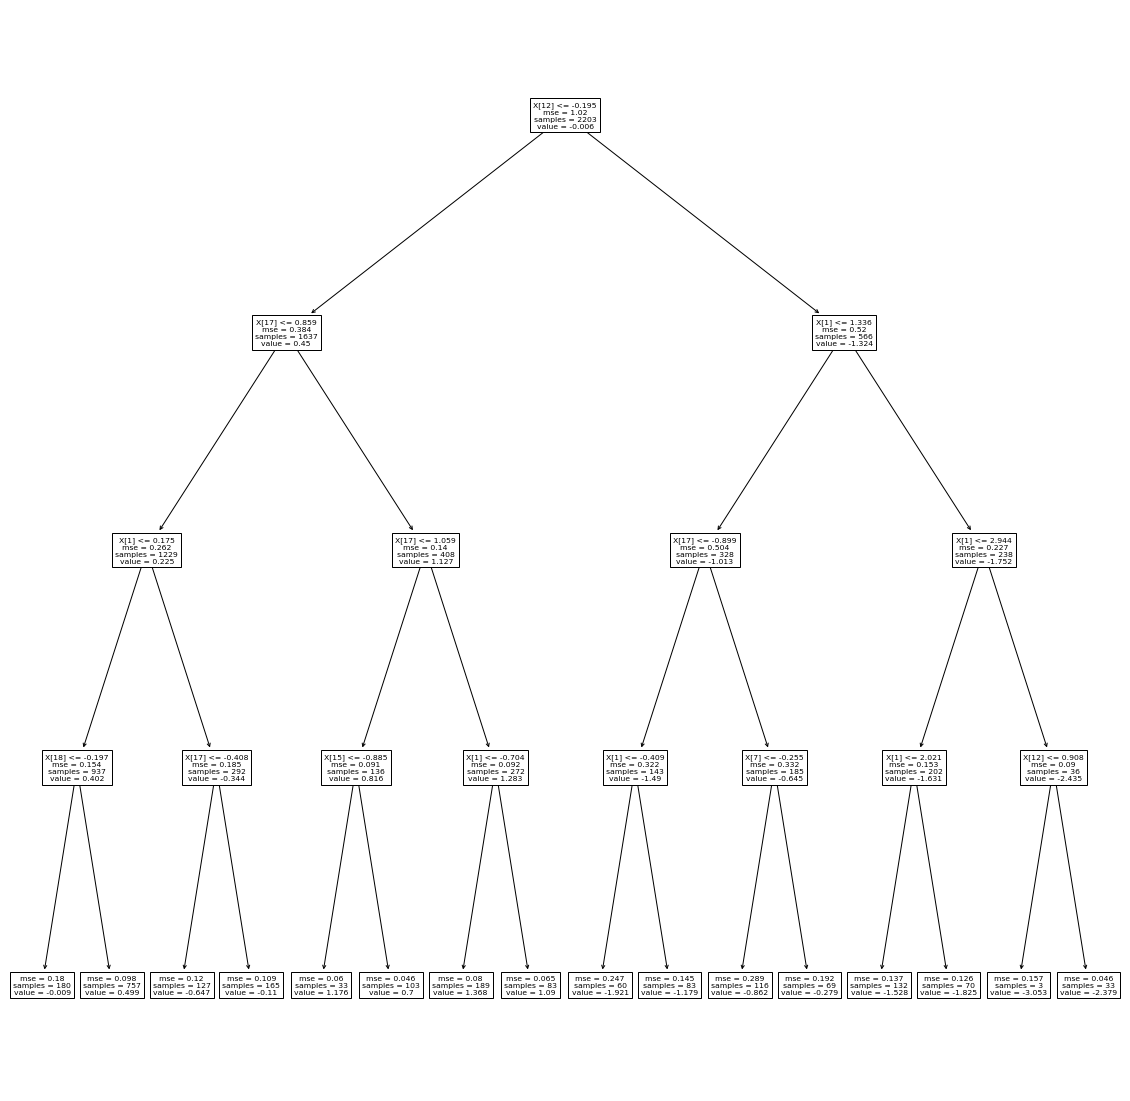

In [170]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Show the decision tree
plt.figure(figsize=(20,20))
plot_tree(tree)

### 4.3.1. Feature Importance of Decision Tree

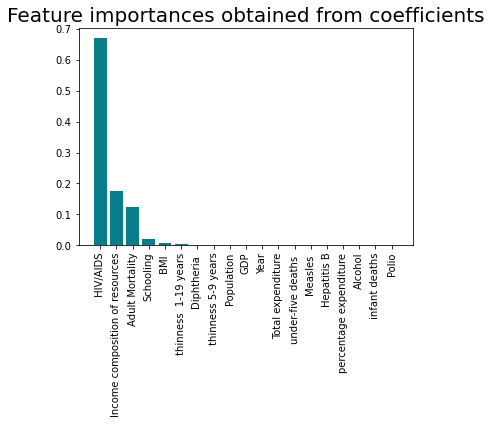

<Figure size 1440x1440 with 0 Axes>

In [185]:
importances = pd.DataFrame(data={
    'Attribute': features_train.columns,
    'Importance': tree.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.figure(figsize=(20,20))
plt.show()

<hr/>

### 4.4. RandomForestRegressor

In [218]:
from sklearn.ensemble import RandomForestRegressor

# Creating a random forest regressor with 100 trees and fitting it to our data

forest = RandomForestRegressor(n_estimators=100)
forest.fit(features_train, targets_train)

# Showing the R Squared (Coefficient of determination) on both train and test data
print("Training accuracy: ",forest.score(features_train, targets_train),"\nTesting accuracy: " ,forest.score(features_test, targets_test))

scores["RandomForest"]=forest.score(features_test, targets_test)

Training accuracy:  0.9946390508741411 
Testing accuracy:  0.9641523101797169


### 4.4.1. Feature Importance of RandomForestRegressor

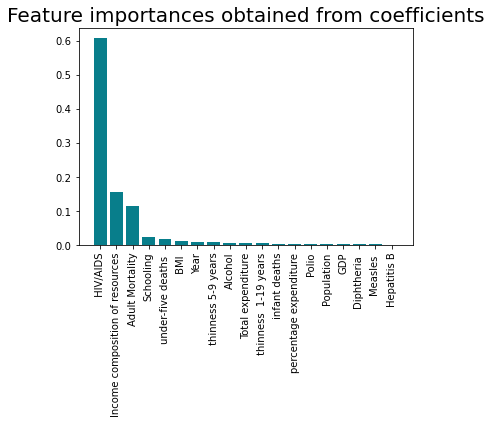

<Figure size 1440x1440 with 0 Axes>

In [186]:
importances = pd.DataFrame(data={
    'Attribute': features_train.columns,
    'Importance': forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.figure(figsize=(20,20))
plt.show()

<hr/>

### 4.5. MLPRegressor

In [220]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Creating a pipeline with mean scaling and a Multilayer Perceptron with default
# parameters. The normalization is essential for the regressor to work
mlp = make_pipeline(StandardScaler(),MLPRegressor())
mlp.fit(features_train, targets_train)

# Showing the R Squared (Coefficient of determination) on both train and test data
print("Training accuracy: ",mlp.score(features_train, targets_train), "\nTesting accuracy: ",mlp.score(features_test, targets_test))

scores["MLPRegressor"]=mlp.score(features_test, targets_test)

Training accuracy:  0.9504702900356486 
Testing accuracy:  0.9275955982280145


<hr/>

### 4.6. SupportVectorMachine

In [222]:
from sklearn.svm import LinearSVR                     # import library
linear_svr_model = LinearSVR(epsilon = 1.5)
linear_svr_model.fit(features_train, targets_train)

print("Training accuracy: ",linear_svr_model.score(features_train, targets_train), "\nTesting accuracy: ",linear_svr_model.score(features_test, targets_test))

scores["LinearSupportVectorMachine"]=linear_svr_model.score(features_test, targets_test)

Training accuracy:  0.508332811547834 
Testing accuracy:  0.5120649001569275


<hr/>

### 4.7. XGBOOST

In [224]:
import xgboost                    # import library

xgbModel_updated = xgboost.XGBRegressor(gamma=1, random_state=42, max_depth=5, max_features=10,learning_rate=0.1, n_estimators=100)
xgbModel_updated.fit(features_train, targets_train)

print("Training accuracy:",xgbModel_updated.score(features_train, targets_train),"\nTesting accuracy:", xgbModel_updated.score(features_test, targets_test))

scores["XGBOOST"]=xgbModel_updated.score(features_test, targets_test)

[21:47:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

Training accuracy: 0.9637462818338082 
Testing accuracy: 0.9472820931260455


<hr/>

### 4.8. LIGHTGBM

In [226]:
import lightgbm as lgb                      # import library

lgbModel_updated = lgb.LGBMRegressor(random_state = 42, learning_rate=0.01, max_depth=4, n_estimators=50)
lgbModel_updated.fit(features_train, targets_train)

print("Training accuracy:", lgbModel_updated.score(features_train, targets_train), "\nTesting accuracy:", lgbModel_updated.score(features_test, targets_test))

scores["LIGHGBM"]=lgbModel_updated.score(features_test, targets_test)

Training accuracy: 0.5677224701616801 
Testing accuracy: 0.5667188025342861


<hr/>

### 4.9. ADABOOSTREGRESSOR

In [227]:
from sklearn.ensemble import AdaBoostRegressor                  # import library

adaModel_updated = AdaBoostRegressor(random_state=42, learning_rate=0.001, n_estimators=100)
adaModel_updated.fit(features_train, targets_train)

print("Training accuracy:",adaModel_updated.score(features_train, targets_train), "\nTesting accuracy:",adaModel_updated.score(features_test, targets_test))

scores["ADABOOSTREGRESSOR"]=adaModel_updated.score(features_test, targets_test)

Training accuracy: 0.8665750813711967 
Testing accuracy: 0.8430973566057568


<hr/>

### 4.10. ELASTICNET

In [231]:
from sklearn.linear_model import ElasticNet                  # import library
en_model = ElasticNet(alpha = 0.01, l1_ratio = 0.8)   # l1_ratio is the ratio of ridge and lasso regression. Here 20:80
en_model.fit(features_train, targets_train)

print("Training accuracy:",en_model.score(features_train, targets_train),"\nTesting accuracy:", en_model.score(features_test, targets_test))
scores['ELASTICNET']=en_model.score(features_test, targets_test)

Training accuracy: 0.8066639864608364 
Testing accuracy: 0.8122767150111921


<hr/>

### 5. SCORES

In [232]:
scores

{'Ridge': 0.824917245940955,
 'DecisionTree': 0.857765827676666,
 'RandomForest': 0.9641523101797169,
 'MLPRegressor': 0.9275955982280145,
 'LinearSupportVectorMachine': 0.5120649001569275,
 'XGBOOST': 0.9472820931260455,
 'LIGHGBM': 0.5667188025342861,
 'ADABOOSTREGRESSOR': 0.8430973566057568,
 'ELASTICNET': 0.8122767150111921}

In [234]:
pd.DataFrame()
# input dictionary
inputDictionary = scores
# creating an empty list
resultList = []
result1=[]
# traversing through each key value pair of a dictionary using items() function
for key, val in inputDictionary.items():
    resultList.append(key)
    result1.append(val)
# printing the resultant list of a dictionary key-values
print(resultList)
print(result1)

['Ridge', 'DecisionTree', 'RandomForest', 'MLPRegressor', 'LinearSupportVectorMachine', 'XGBOOST', 'LIGHGBM', 'ADABOOSTREGRESSOR', 'ELASTICNET']
[0.824917245940955, 0.857765827676666, 0.9641523101797169, 0.9275955982280145, 0.5120649001569275, 0.9472820931260455, 0.5667188025342861, 0.8430973566057568, 0.8122767150111921]


In [253]:
df1= pd.DataFrame()
list1 = list(range(10))
list2 = list(range(10,20))
df1['ALGORITHM'] = resultList
df1['R2_SQUARE'] = result1
df1 = df.sort_values(by = 'R2_SQUARE',ascending=False)
df1

,ALGORITHM,R2_SQUARE
2,RandomForest,0.964152
5,XGBOOST,0.947282
3,MLPRegressor,0.927596
1,DecisionTree,0.857766
7,ADABOOSTREGRESSOR,0.843097
0,Ridge,0.824917
8,ELASTICNET,0.812277
6,LIGHGBM,0.566719
4,LinearSupportVectorMachine,0.512065


### 6. HYPER-PARAMETERS TUNING:

In [258]:
param_random_tree = {"max_depth": [None],
              "max_features": [10,15, 20, 30, 43],
              "min_samples_split": [2, 3, 10,15],
              "min_samples_leaf": [1, 3, 10,15],
              "n_estimators" :[50,100,200,300,500]}

random = RandomForestRegressor(random_state=42)
clf = GridSearchCV(random, param_random_tree, cv=5,  scoring='neg_mean_squared_error',n_jobs= 4, verbose = 1)
clf.fit(features_train, targets_train)
print(clf.best_estimator_)
print(clf.best_score_)
# (max_features=10, min_samples_leaf=15, n_estimators=500, random_state=42)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
RandomForestRegressor(max_features=10, n_estimators=500, random_state=42)
-0.04010265169979518


In [ ]:
scores1={}

In [289]:

forest = RandomForestRegressor(max_features=10, n_estimators=500, random_state=42)
forest.fit(features_train, targets_train)

# Showing the R Squared (Coefficient of determination) on both train and test data
print("Training accuracy: ",forest.score(features_train, targets_train),"\nTesting accuracy: " ,forest.score(features_test, targets_test))

scores1["RandomForest"]=forest.score(features_test, targets_test)

Training accuracy:  0.9950323979042752 
Testing accuracy:  0.9600202171782665


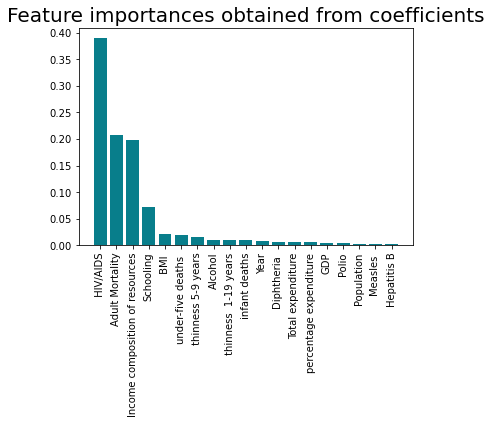

<Figure size 1440x1440 with 0 Axes>

In [310]:
importances = pd.DataFrame(data={
    'Attribute': features_train.columns,
    'Importance': forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.figure(figsize=(20,20))
plt.show()

In [261]:
import xgboost
xgboost_params = {'max_features': [10,15, 20, 30],
                  'n_estimators' :[25,50,100],
                   'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                  'gamma':[0.5, 0.1, 1, 10],
                  'max_depth':[5, 10, 15]}

xgb = xgboost.XGBRegressor(random_state=42)
clf_xgb = GridSearchCV(xgb, xgboost_params, cv=5,  scoring='neg_mean_squared_error',n_jobs= 4, verbose = 1)
clf_xgb.fit(features_train, targets_train)
print(clf.best_estimator_)
print(clf.best_score_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[22:45:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

RandomForestRegressor(max_features=10, n_estimators=500, random_state=42)
-0.04010265169979518


In [264]:
xgbModel_updated = xgboost.XGBRegressor(gamma=1, random_state=42, max_depth=5, max_features=10,learning_rate=0.1, n_estimators=100)
xgbModel_updated.fit(features_train, targets_train)
print("Training accuracy: ",xgbModel_updated.score(features_train, targets_train),"\nTesting accuracy: " ,xgbModel_updated.score(features_test, targets_test))
scores1["XGBOOST"]=xgbModel_updated.score(features_test, targets_test)

[22:47:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

Training accuracy:  0.9599655420516103 
Testing accuracy:  0.9437031782692992


In [266]:
from sklearn.ensemble import AdaBoostRegressor
adam_boosting_params = {'learning_rate':[0.0001, 0.001, 0.003, 0.01, 0.1,1],
                        'n_estimators':[10,20, 50, 100]}
ada = AdaBoostRegressor(random_state=42)
clf_ada = GridSearchCV(ada, adam_boosting_params, cv=5,  scoring='neg_mean_squared_error',n_jobs= 4, verbose = 1)
clf_ada.fit(features_train, targets_train)
print(clf_ada.best_estimator_)
print(clf_ada.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
AdaBoostRegressor(learning_rate=1, n_estimators=100, random_state=42)
-0.1015811572197253


In [270]:
ada_updated = AdaBoostRegressor(random_state=42,learning_rate=1, n_estimators=100)
ada_updated.fit(features_train, targets_train)
print("Training accuracy: ",ada_updated.score(features_train, targets_train),"\nTesting accuracy: " ,ada_updated.score(features_test, targets_test))
scores1["ADABOOST"]=ada_updated.score(features_test, targets_test)

Training accuracy:  0.9111919917047728 
Testing accuracy:  0.8954319402259687


In [276]:

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# Instantiate the grid search model

dt = DecisionTreeRegressor(random_state=42)
                            
                            
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=parameters, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(features_test, targets_test)

print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 4 folds for each of 50400 candidates, totalling 201600 fits
DecisionTreeRegressor(max_depth=1, max_features='auto',
                      min_weight_fraction_leaf=0.1, random_state=42)
nan


In [283]:
dt_updated = DecisionTreeRegressor(max_depth=4, max_features='auto',
                      min_weight_fraction_leaf=0.1, random_state=42)
dt_updated.fit(features_train, targets_train)
print("Training accuracy: ",dt_updated.score(features_train, targets_train),"\nTesting accuracy: " ,dt_updated.score(features_test, targets_test))
scores1["DecisionTree"]=dt_updated.score(features_test, targets_test)

Training accuracy:  0.7945479175356773 
Testing accuracy:  0.8008570637470124


### 7.SCORES AFTER HYPERPARAMETER TUNING

In [290]:
pd.DataFrame()
# input dictionary
inputDictionary = scores1
# creating an empty list
resultList = []
result1=[]
# traversing through each key value pair of a dictionary using items() function
for key, val in inputDictionary.items():
    resultList.append(key)
    result1.append(val)
# printing the resultant list of a dictionary key-values
print(resultList)
print(result1)

['XGBOOST', 'ADABOOST', 'DecisionTree', 'RandomForest']
[0.9437031782692992, 0.8954319402259687, 0.8008570637470124, 0.9600202171782665]


In [291]:
df2= pd.DataFrame()
list1 = list(range(10))
list2 = list(range(10,20))
df2['ALGORITHM'] = resultList
df2['R2_SQUARE'] = result1
df2 = df2.sort_values(by = 'R2_SQUARE',ascending=False)
df2

,ALGORITHM,R2_SQUARE
3,RandomForest,0.960020
0,XGBOOST,0.943703
1,ADABOOST,0.895432
2,DecisionTree,0.800857


<hr/>

<hr/>

### 8. TRIAL AND ERROR (Some of the trial and error method used)

## Trying out different other methods by using One hot encoding and adding Categorical values into Models

In [305]:
df              # displaying the dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [314]:
df.drop(["Country"],axis=1,inplace=True)       # delete "Country" and "Status" from the columns of the dataset
status_dummy=pd.get_dummies(df['Status'])
df.drop(["Status"],axis=1,inplace=True)
df=pd.concat([df,status_dummy],axis=1)


In [315]:
df.head()              # used to get the first n rows

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


<AxesSubplot:>

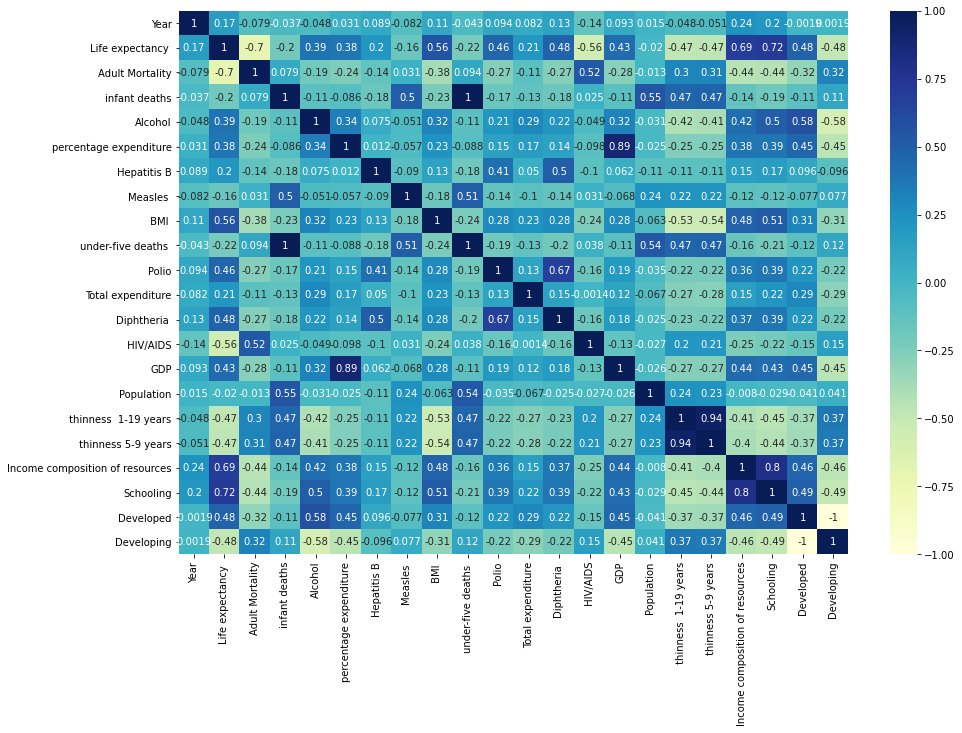

In [316]:
# plotting the heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [317]:
y=df[["Life expectancy "]]                       # deletes the "Life expectancy" column    
df.drop(["Life expectancy "],axis=1,inplace=True)
x=df

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [318]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test (0.75/0.25 train/test). Shuffle the data

features_train, features_test, targets_train, targets_test = train_test_split(x, y, shuffle=True)

In [320]:
scores2={}

In [321]:
from sklearn.linear_model import Ridge

# Create a ridge regressor with default parameters and fit it to our data
ridge = Ridge()
ridge.fit(features_train, targets_train)
print("Training accuracy: ",ridge.score(features_train, targets_train),"\nTesting accuracy: ", ridge.score(features_test, targets_test))

test=ridge.score(features_test, targets_test)

scores2["Ridge"]=test


Training accuracy:  0.8237723650990147 
Testing accuracy:  0.801414216616346


### RandomForestRegressor


In [322]:
from sklearn.ensemble import RandomForestRegressor

# Creating a random forest regressor with 100 trees and fitting it to our data

forest = RandomForestRegressor(n_estimators=100)
forest.fit(features_train, targets_train)

# Showing the R Squared (Coefficient of determination) on both train and test data
print("Training accuracy: ",forest.score(features_train, targets_train),"\nTesting accuracy: " ,forest.score(features_test, targets_test))

scores2["RandomForest"]=forest.score(features_test, targets_test)

Training accuracy:  0.9947995278903652 
Testing accuracy:  0.9538583009635795


### MLPRegressor

In [323]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Creating a pipeline with mean scaling and a Multilayer Perceptron with default
# parameters. The normalization is essential for the regressor to work
mlp = make_pipeline(StandardScaler(),MLPRegressor())
mlp.fit(features_train, targets_train)

# Showing the R Squared (Coefficient of determination) on both train and test data
print("Training accuracy: ",mlp.score(features_train, targets_train), "\nTesting accuracy: ",mlp.score(features_test, targets_test))

scores2["MLPRegressor"]=mlp.score(features_test, targets_test)

Training accuracy:  0.7327680236745412 
Testing accuracy:  0.6973415922227078


### AdaBoostRegressor

In [324]:
from sklearn.ensemble import AdaBoostRegressor

adaModel_updated = AdaBoostRegressor(random_state=42, learning_rate=0.001, n_estimators=100)
adaModel_updated.fit(features_train, targets_train)

print("Training accuracy:",adaModel_updated.score(features_train, targets_train), "\nTesting accuracy:",adaModel_updated.score(features_test, targets_test))

scores["ADABOOSTREGRESSOR"]=adaModel_updated.score(features_test, targets_test)

Training accuracy: 0.8546036930233273 
Testing accuracy: 0.8159317871453263


## PCA- Principal Component Analysis

- PCA is an unsupervised pre-processing task that is carried out before applying any ML algorithm. PCA is based on “orthogonal linear transformation” which is a mathematical technique to project the attributes of a data set onto a new coordinate system. The attribute which describes the most variance is called the first principal component and is placed at the first coordinate. Similarly, the attribute which stands second in describing variance is called a second principal component and so on. In short, the complete dataset can be expressed in terms of principal components. Usually, more than 90% of the variance is explained by two/three principal components. Principal component analysis, or PCA, thus converts data from high dimensional space to low dimensional space by selecting the most important attributes that capture maximum information about the dataset.

In [325]:
from sklearn.decomposition import PCA           # import library

In [326]:
df_pca = pd.read_csv(r"C:\Users\USER\Downloads\Life Expectancy Data_HV22.csv")       # importing dataset

In [327]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)

df_pca['Life expectancy ']=imputer.fit_transform(df_pca[['Life expectancy ']])
df_pca['Adult Mortality']=imputer.fit_transform(df_pca[['Adult Mortality']])
df_pca['Alcohol']=imputer.fit_transform(df_pca[['Alcohol']])
df_pca['Hepatitis B']=imputer.fit_transform(df_pca[['Hepatitis B']])
df_pca[' BMI ']=imputer.fit_transform(df_pca[[' BMI ']])
df_pca['Polio']=imputer.fit_transform(df_pca[['Polio']])
df_pca['Total expenditure']=imputer.fit_transform(df_pca[['Total expenditure']])
df_pca['Diphtheria ']=imputer.fit_transform(df_pca[['Diphtheria ']])
df_pca['GDP']=imputer.fit_transform(df_pca[['GDP']])
df_pca['Population']=imputer.fit_transform(df_pca[['Population']])
df_pca[' thinness  1-19 years']=imputer.fit_transform(df_pca[[' thinness  1-19 years']])
df_pca[' thinness 5-9 years']=imputer.fit_transform(df_pca[[' thinness 5-9 years']])
df_pca['Income composition of resources']=imputer.fit_transform(df_pca[['Income composition of resources']])
df_pca['Schooling']=imputer.fit_transform(df_pca[['Schooling']])

In [328]:
df_pca.drop(["Country"],axis=1,inplace=True)
df_pca.drop(["Status"],axis=1,inplace=True)
df_pca
df_pca.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [329]:
y=df_pca[["Life expectancy "]]
df_pca.drop(["Life expectancy "],axis=1,inplace=True)
x=df_pca
x

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


##### STANDARD SCALER

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [330]:
sc = StandardScaler()
X_stand = sc.fit_transform(x)

In [331]:
pca = PCA(n_components=7)
pca.fit(X_stand)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
X_pca = pca.transform(X_stand)
X_pca.shape

(2938, 7)

In [332]:
#splitting the dataset into train and test
features_train, features_test, targets_train, targets_test = train_test_split(X_pca,y,test_size=0.33,random_state=42)

In [333]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.29181107, 0.13605356, 0.09290921, 0.07165826, 0.06447818,
       0.05455508, 0.04465888])

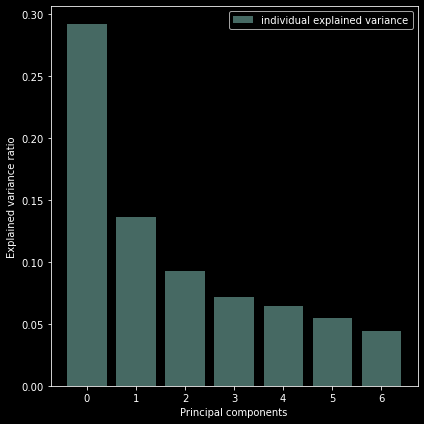

In [334]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6,6))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [335]:
scores={}

from sklearn.linear_model import Ridge

# Create a ridge regressor with default parameters and fit it to our data
ridge = Ridge()
ridge.fit(features_train, targets_train)
print("Training accuracy: ",ridge.score(features_train, targets_train),"\nTesting accuracy: ", ridge.score(features_test, targets_test))

test=ridge.score(features_test, targets_test)

scores["Ridge"]=test


Training accuracy:  0.7730603221919655 
Testing accuracy:  0.7855827944515223


In [336]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor with max depth of 4 and fit it 
# to our data
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(features_train, targets_train)

# Show the R Squared (Coefficient of determination) on both train and test data
print("Training accuracy: ",tree.score(features_train, targets_train),"\nTesting accuracy: ", tree.score(features_test, targets_test))

scores["DecisionTree"]=tree.score(features_test, targets_test)

Training accuracy:  0.7930500507338032 
Testing accuracy:  0.7371236450454975


**The same pattern was followed with other models too while we did Principal Component Analysis on our data, It was not giving a significant amount of better accuracy to our models and so we decided to not go forward with PCA as it just complicates the model. And when it comes to model it is not just about accuracy but also about the time complexity and computational complexity**

<hr/>

<hr/>

# CONCLUSION

Life expectancy is the average number of years that a person is expected to live. It is a measure that summarizes the mortality of a country, allowing us to compare it by generations and analyze trends. Its interpretation and meaning is even richer and can provide us with key information on the level of development of a country's welfare state.In fact, this indicator is so important for describing population conditions that, together with the education index and the Gross Domestic Product (GDP) index, it forms the Human Development Index.There is no better indicator of a country's social development than having a long and healthy life.Life expectancy expansion is a result of, among other things, improvements in nutrition, health and, above all, a decrease in mortality.

We used the the dataset to get as many inference we can and also to answer all the given key problems in our problem statement.Through the process we learned a lot about Life Expectancy and various factors that affect Life expectancy.Now these information can be used each countries to improve various sectors of their country which will in turn improve their Health care and Life Expectancy

<hr/>

--------------------------------------------------------------------------------------------------------------------------------

<hr/>

<hr/>